In [1]:
from Plot_Functions import CollectData 

import numpy as np
import pandas as pd
import json



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold

import scipy
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import NonlinearConstraint


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
from sklearn.model_selection import train_test_split


import seaborn as sns
import GPy
import GPyOpt
from numpy.random import seed


from matplotlib.font_manager import FontProperties
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 20,
    'style'  : 'normal'}

# font = {'family' : 'Helevatica',
#     'weight' : 'medium',
#     'size'   : 20,
#     'style'  : 'normal'}

In [2]:
root_path = './'
carbon_source_filepath = './'

In [3]:
Stock_solid = pd.read_excel(carbon_source_filepath+'CarbonSourceInfo.xlsx', 'Stocks_solid')
Stock_liquid = pd.read_excel(carbon_source_filepath+'CarbonSourceInfo.xlsx', 'Stocks_liquid')

Carbon_Names = Stock_solid['Carbon Source'].values.tolist()
Carbon_Names.append(Stock_liquid['Carbon Source'][1])
Carbon_Names.append(Stock_liquid['Carbon Source'][2])

In [4]:
Molecule_list = ['HSA', 'Trastuzumab','RBDJ'] # RBDJ,  'HSA', 'HerceptinA' 
N_round_list = [6,6, 6]
Molecule_Name = 'RBDJ'

In [5]:
Design, Design_all, Result, Titer_all, SP_all, OD_prod_all, OD_og_all, res_bench, res_bench_all = CollectData(
    root_path, carbon_source_filepath, Molecule_list,N_round_list)

Limits = dict()
for m in Molecule_list:
    Limits[m] = {}
    Limits[m]['lb_sp'] = 7 *[np.min(res_bench_all[m][:,1])]
    Limits[m]['ub_sp'] = 7 *[np.max(res_bench_all[m][:,1])]
    Limits[m]['lb_titer'] = 7 *[np.min(res_bench_all[m][:,0])]
    Limits[m]['ub_titer'] = 7 *[np.max(res_bench_all[m][:,0])]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

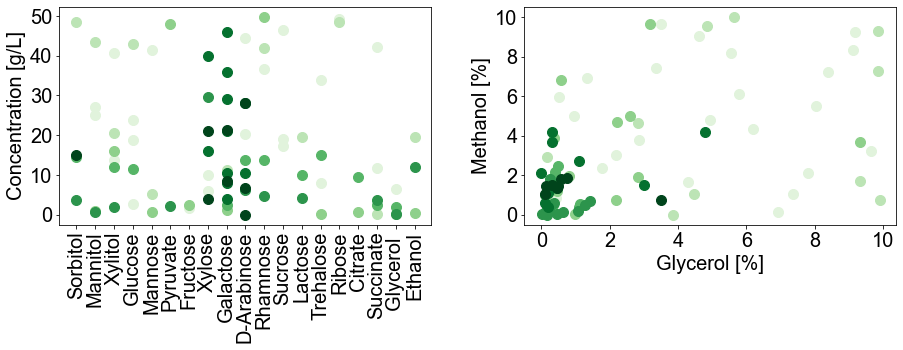

In [6]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (15,4)
fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace':0.1, 'wspace': 0.25})

cmap = matplotlib.cm.get_cmap('Greens')
# color_list = ['gold','rosybrown','slategray','navy','purple','forestgreen','saddlebrown']


for nr in range (7): #N_round_list[Molecule_list.index(Molecule_Name)]
    if nr == 0 or nr == 1 or nr==2:
        axs[0].scatter(Design[Molecule_Name][nr][:, 0], 
                       Design[Molecule_Name][nr][:, 1], s = 100, c = cmap((nr+1)/7)) #, alpha = 0.1
    elif nr == 6:
        axs[0].scatter(Design[Molecule_Name][nr][-8:, 0], 
                       Design[Molecule_Name][nr][-8:, 1], s = 100,c = cmap((nr+1)/7))
    else: 
        axs[0].scatter(Design[Molecule_Name][nr][:, 0], 
                       Design[Molecule_Name][nr][:, 1], s = 100, c = cmap((nr+1)/7))
    
    
    axs[0].set_xticks(ticks=np.arange(0,19), labels=Carbon_Names, rotation = 90, **hfont)
    axs[0].set_ylabel('Concentration [g/L]', **hfont) #xlabel=Column_Names[1],
    

axs[0].set_xticklabels(Carbon_Names, **hfont)
axs[0].set_yticks(np.arange(0, 51, 10))
axs[0].set_yticklabels(np.arange(0, 51, 10), **hfont)


for nr in range (7): #N_round_list[Molecule_list.index(Molecule_Name)]
    
    if nr == 0 or nr ==1 or nr ==2:
        axs[1].scatter(Design[Molecule_Name][nr][:, 2], 
                       Design[Molecule_Name][nr][:, 3], s = 100, c = cmap((nr+1)/7)) #color_list[nr], alpha = 0.7
    elif nr == 6:
        axs[1].scatter(Design[Molecule_Name][nr][-8:, 2], 
                       Design[Molecule_Name][nr][-8:, 3], s = 100, c = cmap((nr+1)/7)) #color_list[nr]
    else:
        axs[1].scatter(Design[Molecule_Name][nr][:, 2], Design[Molecule_Name][nr][:, 3], s = 100,
                       c = cmap((nr+1)/7)) #color_list[nr]
    
    axs[1].set_xlabel('Glycerol [%]', **hfont)
    axs[1].set_ylabel('Methanol [%]', **hfont)
    axs[1].set_yticks(np.arange(0, 11, 2))
    axs[1].set_yticklabels(np.arange(0, 11, 2), **hfont)
    axs[1].set_xticks(np.arange(0, 11, 2))
    axs[1].set_xticklabels(np.arange(0, 11, 2), **hfont)


plt.savefig("./Plots/RBDJ_DesSpace.pdf", dpi = 300, bbox_inches = "tight")

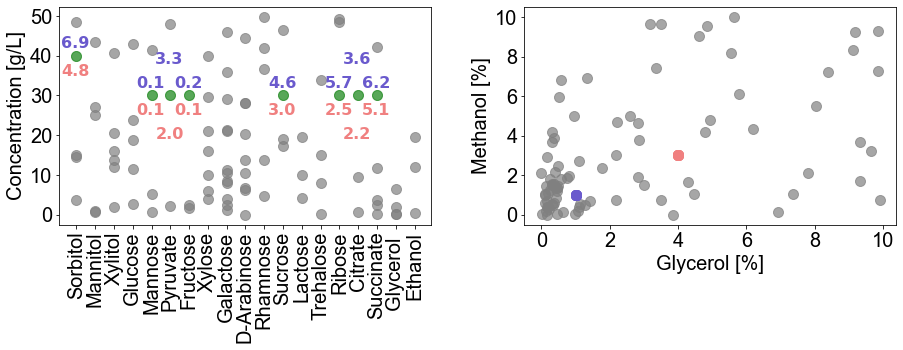

In [7]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (15,4)
fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace':0.1, 'wspace': 0.25})

color_list = ['grey']*7


for nr in range (7): #N_round_list[Molecule_list.index(Molecule_Name)]
    if nr != 6:
        axs[0].scatter(Design[Molecule_Name][nr][:, 0], 
                   Design[Molecule_Name][nr][:, 1], s = 100, c = color_list[nr], alpha = 0.7) #, alpha = 0.1
    elif nr == 6:
        axs[0].scatter(Design[Molecule_Name][nr][-8:, 0], 
                           Design[Molecule_Name][nr][-8:, 1], s = 100, c = color_list[nr], alpha = 0.7)
    if nr == 6:
        axs[0].scatter(Design[Molecule_Name][nr][:-8, 0], 
                           Design[Molecule_Name][nr][:-8, 1], s = 100, c = 'forestgreen', alpha = 0.5)
        
        for xx in np.arange(-16,-8):
            len_des = Design[Molecule_Name][nr].shape[0]
            val = np.round(Result[Molecule_Name][nr][len_des+xx,1], 1)
            
            if Design[Molecule_Name][nr][xx, 0] in np.arange(0,20,2).tolist()+[11]:
                axs[0].text(Design[Molecule_Name][nr][xx, 0]-0.8, Design[Molecule_Name][nr][xx, 1]+2, str(val),
                       fontsize=16, c='slateblue', rotation = 0, fontweight = 'bold') #
            else:
                axs[0].text(Design[Molecule_Name][nr][xx, 0]-0.8, Design[Molecule_Name][nr][xx, 1]+8, str(val),
                       fontsize=16, c='slateblue', rotation = 0, fontweight = 'bold') #
            
        for xx in np.arange(-24,-16):
            len_des = Design[Molecule_Name][nr].shape[0]
            val = np.round(Result[Molecule_Name][nr][len_des+xx,1], 1)
            if Design[Molecule_Name][nr][xx, 0] in np.arange(0,20,2).tolist()+[11]:
                axs[0].text(Design[Molecule_Name][nr][xx, 0]-0.8, Design[Molecule_Name][nr][xx, 1]-5, str(val),
                           fontsize=16, c='lightcoral', rotation = 0, fontweight = 'bold') #
            else:
                axs[0].text(Design[Molecule_Name][nr][xx, 0]-0.8, Design[Molecule_Name][nr][xx, 1]-11, str(val),
                           fontsize=16, c='lightcoral', rotation = 0, fontweight = 'bold') #
                
            

    axs[0].set_xticks(ticks=np.arange(0,19), labels=Carbon_Names, rotation = 90, **hfont)
    axs[0].set_ylabel('Concentration [g/L]', **hfont) #xlabel=Column_Names[1],
    

axs[0].set_xticklabels(Carbon_Names, **hfont)
axs[0].set_yticks(np.arange(0, 51, 10))
axs[0].set_yticklabels(np.arange(0, 51, 10), **hfont)


for nr in range (7): #N_round_list[Molecule_list.index(Molecule_Name)]
    if nr != 6:
        axs[1].scatter(Design[Molecule_Name][nr][:, 2], 
                           Design[Molecule_Name][nr][:, 3], s = 100, c = color_list[nr], alpha = 0.7) #
    elif nr == 6:
        axs[1].scatter(Design[Molecule_Name][nr][-8:, 2], 
                           Design[Molecule_Name][nr][-8:, 3], s = 100, c = color_list[nr], alpha = 0.7)
    
    if nr == 6:
        axs[1].scatter(Design[Molecule_Name][nr][-16:-8, 2], 
                           Design[Molecule_Name][nr][-16:-8, 3], s = 100, c = 'slateblue', alpha = 1)
        axs[1].scatter(Design[Molecule_Name][nr][-24:-16, 2], 
                           Design[Molecule_Name][nr][-24:-16, 3], s = 100, c = 'lightcoral', alpha = 1)
    
    axs[1].set_xlabel('Glycerol [%]', **hfont)
    axs[1].set_ylabel('Methanol [%]', **hfont)
    axs[1].set_yticks(np.arange(0, 11, 2))
    axs[1].set_yticklabels(np.arange(0, 11, 2), **hfont)
    axs[1].set_xticks(np.arange(0, 11, 2))
    axs[1].set_xticklabels(np.arange(0, 11, 2), **hfont)


plt.savefig("./Plots/ExpPlanned.pdf", dpi = 300, bbox_inches = "tight")

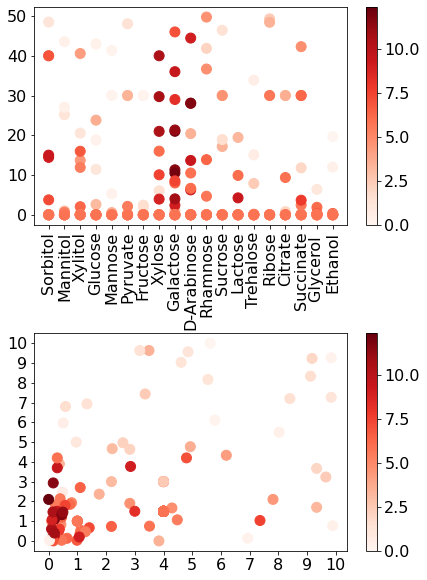

In [9]:
Carbon_Names_Update = Carbon_Names + ['No Co-Feed']
params = {'axes.titlesize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'axes.labelsize': 16}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (7, 10)
fig, axs = plt.subplots(2,1, gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

z0_plot = axs[0].scatter(Design_all[Molecule_Name][:, 0], Design_all[Molecule_Name][:, 1], 
                         s = 100, c = SP_all[Molecule_Name], cmap = 'Reds')
axs[0].set_xticks(ticks=np.arange(0, 19))
# axs[0].set(xlabel = Column_Names[1], ylabel = Column_Names[2])
axs[0].set_xticklabels(Carbon_Names, rotation = 90)
plt.colorbar(z0_plot, ax = axs[0])

z1_plot = axs[1].scatter(Design_all[Molecule_Name][:, 2], Design_all[Molecule_Name][:, 3], 
                         s = 100, c = SP_all[Molecule_Name], cmap = 'Reds')

axs[1].set_xticks(ticks = np.arange(0,11,1), rotation = 45)
axs[1].set_yticks(ticks = np.arange(0,11,1), rotation = 45)
# axs[1].set(xlabel = Column_Names[3], ylabel = Column_Names[4])
plt.colorbar(z1_plot,ax=axs[1])


plt.savefig('./Plots/DesignSpace_SPcolor.png', dpi = 300,bbox_inches='tight')

### Plotting Heat Map

[0.5 1.5 2.5 3.5 4.5 5.5 6.5]


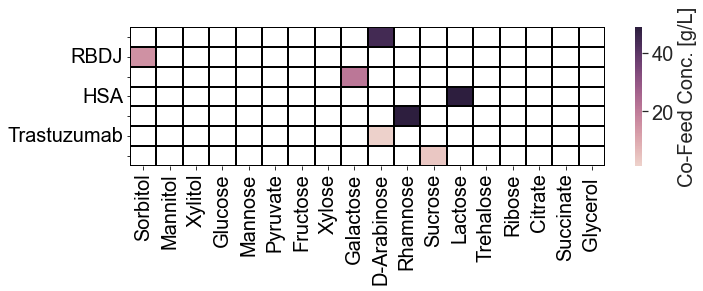

In [10]:
Carbon = np.zeros((7, len(Carbon_Names)  ))
Carbon = np.nan * np.ones((7, len(Carbon_Names)  ))

Carbon[0, Design_all['RBDJ'][15, 0]] = Design_all['RBDJ'][15, 1]
Carbon[1, Design_all['RBDJ'][208, 0]] = Design_all['RBDJ'][208, 1]
Carbon[2, Design_all['RBDJ'][167, 0]] = Design_all['RBDJ'][167, 1]


Carbon [3, int(Design_all['HSA'][189,0])] = Design_all['HSA'][189,1]
Carbon [4, int(Design_all['HSA'][136,0])] = Design_all['HSA'][136,1]

Carbon [5, int(Design_all['Trastuzumab'][103,0])] = Design_all['Trastuzumab'][103,1]
Carbon [6, int(Design_all['Trastuzumab'][162,0])] = Design_all['Trastuzumab'][162,1]


params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (11,4)
fig, axs = plt.subplots(1, 1) 
plt.gcf().subplots_adjust(bottom=0.4, left = 0.15)
sns.set(font = "Arial")

h_map = sns.heatmap(Carbon[:, :-1], linewidths=2,  linecolor = 'black',
            cmap= sns.cubehelix_palette(as_cmap=True),#'PuBuGn',
            yticklabels=['', 'RBDJ','', 'HSA','','Trastuzumab',''], 
            xticklabels = Carbon_Names[:-1],cbar_kws={'label': 'Co-Feed Conc. [g/L]'})
print(h_map.get_yticks())
cbar = h_map.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label='Co-Feed Conc. [g/L]', fontsize = 20, font = 'Arial')

plt.savefig("./Plots/HeatMap_OptimalMedia.pdf", dpi = 300, bbox_inches = "tight")

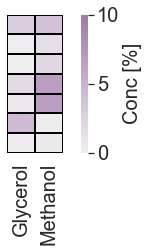

In [11]:
Gly_Met = np.zeros((7, 2 ))

Gly_Met[0,:] = Design_all['RBDJ'][15, 2:4]
Gly_Met[1,:] = Design_all['RBDJ'][208, 2:4]
Gly_Met[2,:] = Design_all['RBDJ'][167, 2:4]

Gly_Met [3,:] = Design_all['HSA'][189,2:4]
Gly_Met [4,:] = Design_all['HSA'][136,2:4]

Gly_Met [5,:] = Design_all['Trastuzumab'][103,2:4]
Gly_Met [6,:] = Design_all['Trastuzumab'][162,2:4]

params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (2,4)
fig, axs = plt.subplots(1, 1)
plt.gcf().subplots_adjust(bottom=0.4, right = 0.6, left = 0.0)
sns.set(font = "Arial")

h_map2 = sns.heatmap(Gly_Met, linewidths=2, linecolor = 'black', 
            cmap = sns.light_palette("#a275ac",as_cmap=True),  #"navy"
            yticklabels=['']*7, 
            xticklabels = ['Glycerol', 'Methanol'], 
           vmin=0, vmax=10, cbar_kws={'label': 'Conc [%]', 'pad': 0.2})

cbar2 = h_map2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=20)
cbar2.set_label(label='Conc [%]', fontsize = 20, font = 'Arial') #, weight = 'bold'

plt.savefig("./Plots/HeatMap_OptimalMedia_v2.pdf", dpi = 300, bbox_inches = "tight")